In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploration/Cleaning


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

In [ ]:
churn = pd.read_excel('/content/drive/MyDrive/Telco-Customer-Churn.xlsx')

In [ ]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
churn.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
churn.drop(columns=['customerID'], inplace=True)

In [ ]:
churn['OnlineBackup']

,OnlineBackup
0,Yes
1,No
2,Yes
3,No
4,No
...,...
7038,No
7039,Yes
7040,No
7041,No


In [ ]:
churn.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
churn.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
churn['SeniorCitizen'] = churn['SeniorCitizen'].astype('category')
churn['Partner'] = churn['Partner'].astype('category')
churn['Dependents'] = churn['Dependents'].astype('category')
churn['PhoneService'] = churn['PhoneService'].astype('category')
churn['OnlineSecurity'] = churn['OnlineSecurity'].astype('category')
churn['OnlineBackup'] = churn['OnlineBackup'].astype('category')
churn['DeviceProtection'] = churn['DeviceProtection'].astype('category')
churn['TechSupport'] = churn['TechSupport'].astype('category')
churn['StreamingTV'] = churn['StreamingTV'].astype('category')
churn['StreamingMovies'] = churn['StreamingMovies'].astype('category')
churn['PaperlessBilling'] = churn['PaperlessBilling'].astype('category')
churn['Churn'] = churn['Churn'].astype('category')
churn['MultipleLines'] = churn['MultipleLines'].astype('category')

In [ ]:
churn[['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Churn']] = \
    churn[['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
           'StreamingMovies', 'PaperlessBilling', 'Churn']].replace({'No': 0, 'Yes': 1}).infer_objects(copy=False)


<ipython-input-48-8433cb638cab>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  'StreamingMovies', 'PaperlessBilling', 'Churn']].replace({'No': 0, 'Yes': 1}).infer_objects(copy=False)
<ipython-input-48-8433cb638cab>:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  'StreamingMovies', 'PaperlessBilling', 'Churn']].replace({'No': 0, 'Yes': 1}).infer_objects(copy=False)
<ipython-input-48-8433cb638cab>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call 

In [ ]:
churnNumber = churn.select_dtypes(include=['number'])
churnNumber

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70
...,...,...
7038,24,84.80
7039,72,103.20
7040,11,29.60
7041,4,74.40


In [ ]:
#Converting TotalCharges to float, I received an error stating that there was a string on row 488
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

In [ ]:
churn.dropna(subset=['TotalCharges'], inplace=True)

In [ ]:
churn['TotalCharges'] = churn['TotalCharges'].astype(float)
churn['MonthlyCharges'] = churn['MonthlyCharges'].astype(float)

In [ ]:
churn.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


#Graphing

This count plot shows the proportion of customer churn.

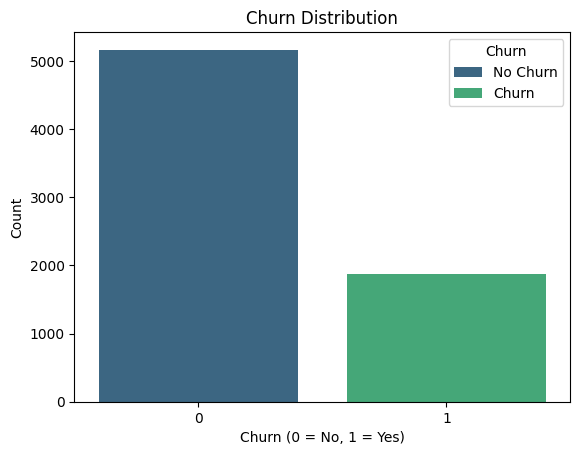

In [ ]:
sns.countplot(x=churn['Churn'], hue=churn['Churn'], palette='viridis')
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=['No Churn', 'Churn'])
plt.show()

This count plot helps us better understand customer churn related to contract lengths. We can easily identify that there is a correlation between customer churn and shorter payment periods.

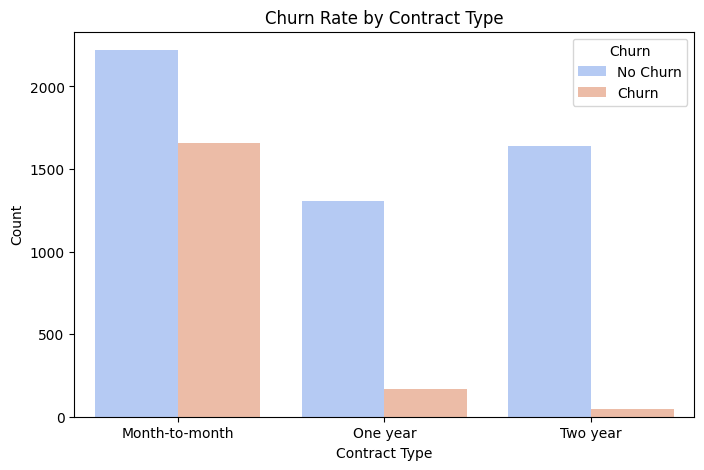

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=churn, palette='coolwarm')
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.legend(title="Churn", labels=['No Churn', 'Churn'])
plt.show()

This countplot helps us to identify churn rates related to method of check payments. Electronic check payment methods are clearly correlated with higher customer churn rates.

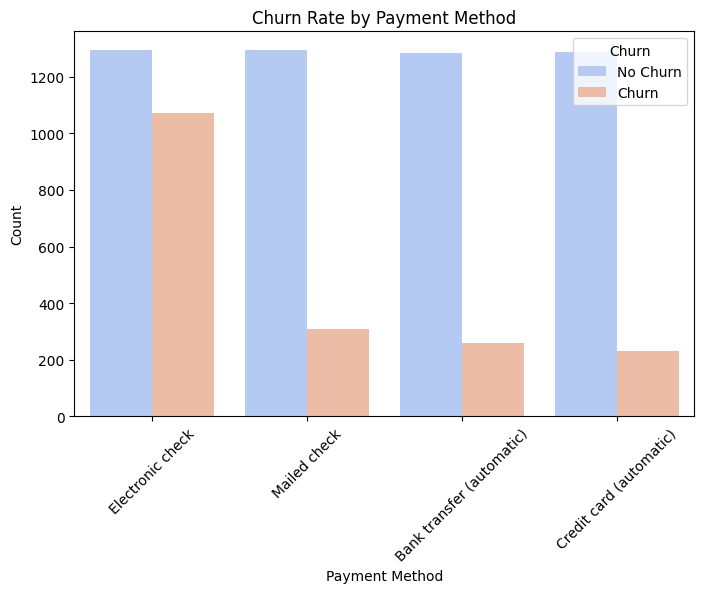

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='PaymentMethod', hue='Churn', data=churn, palette='coolwarm')
plt.title("Churn Rate by Payment Method")
plt.xticks(rotation=45)
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.legend(title="Churn", labels=['No Churn', 'Churn'])
plt.show()

#Preprocessing


In [ ]:
print(churn['Churn'].unique())


[0, 1]
Categories (2, int64): [0, 1]


In [ ]:
churn['Churn'] = churn['Churn'].astype(int)


In [ ]:
print(churn['Churn'].unique())


[0 1]


In [ ]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')


In [ ]:
churn_encoded = pd.get_dummies(churn, drop_first=True)

In [ ]:
churn_encoded.head()


,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_1,Dependents_1,PhoneService_1,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_1,StreamingMovies_No internet service,StreamingMovies_1,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,0,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,1,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,0,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,1,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
churn_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7032 non-null   int64  
 1   MonthlyCharges                         7032 non-null   float64
 2   TotalCharges                           7032 non-null   float64
 3   Churn                                  7032 non-null   int64  
 4   gender_Male                            7032 non-null   bool   
 5   SeniorCitizen_1                        7032 non-null   bool   
 6   Partner_1                              7032 non-null   bool   
 7   Dependents_1                           7032 non-null   bool   
 8   PhoneService_1                         7032 non-null   bool   
 9   MultipleLines_No phone service         7032 non-null   bool   
 10  MultipleLines_Yes                      7032 non-null   bool   
 11  InternetS

In [ ]:
target = churn['Churn']
print(target.value_counts(normalize=True))

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


In [ ]:
predictors = churn.drop(['Churn'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(4922, 19) (2110, 19) (4922,) (2110,)


In [ ]:
combined_train_df = pd.concat([predictors_train, target_train], axis=1)

majority_df = combined_train_df[combined_train_df['Churn'] == 0]
minority_df = combined_train_df[combined_train_df['Churn'] == 1]

undersampled_majority = majority_df.sample(n=len(minority_df), random_state=5)

undersampled_data = pd.concat([undersampled_majority, minority_df])

balanced_data = undersampled_data.sample(frac=1, random_state=5)

predictors_train = balanced_data.drop(columns=['Churn'])
target_train = balanced_data['Churn']

In [ ]:
print(target_train.value_counts(normalize=True))

Churn
1    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:
print(target_test.value_counts(normalize=True))

Churn
0    0.736967
1    0.263033
Name: proportion, dtype: float64


# Decision Tree Model Prediction


In [ ]:
predictors_train = pd.get_dummies(predictors_train, drop_first=True)
predictors_test = pd.get_dummies(predictors_test, drop_first=True)

missing_cols = set(predictors_train.columns) - set(predictors_test.columns)
for col in missing_cols:
    predictors_test[col] = 0  # Add missing columns with default value 0

predictors_test = predictors_test[predictors_train.columns]

print(predictors_train.dtypes[predictors_train.dtypes == 'object'])


Series([], dtype: object)


In [ ]:
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 2)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

The root node splits on Contract_Two year, where customers with a two-year contract mostly do not churn, while those without a two-year contract are evenly split between churning and staying. The next split occurs on Contract_One year, where customers without a one-year contract are more likely to churn than those with one. The rightmost branch further splits on MonthlyCharges, where customers with lower charges tend to not churn, while those with higher charges have a slightly higher churn rate.

[Text(0.5, 0.8333333333333334, 'Contract_Two year <= 0.5\nentropy = 1.0\nsamples = 2628\nvalue = [1314, 1314]\nclass = No'),
 Text(0.25, 0.5, 'Contract_One year <= 0.5\nentropy = 0.975\nsamples = 2164\nvalue = [883, 1281]\nclass = Yes'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.906\nsamples = 1718\nvalue = [553, 1165]\nclass = Yes'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.827\nsamples = 446\nvalue = [330.0, 116.0]\nclass = No'),
 Text(0.75, 0.5, 'MonthlyCharges <= 92.425\nentropy = 0.37\nsamples = 464\nvalue = [431, 33]\nclass = No'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.186\nsamples = 354\nvalue = [344, 10]\nclass = No'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.74\nsamples = 110\nvalue = [87, 23]\nclass = No')]

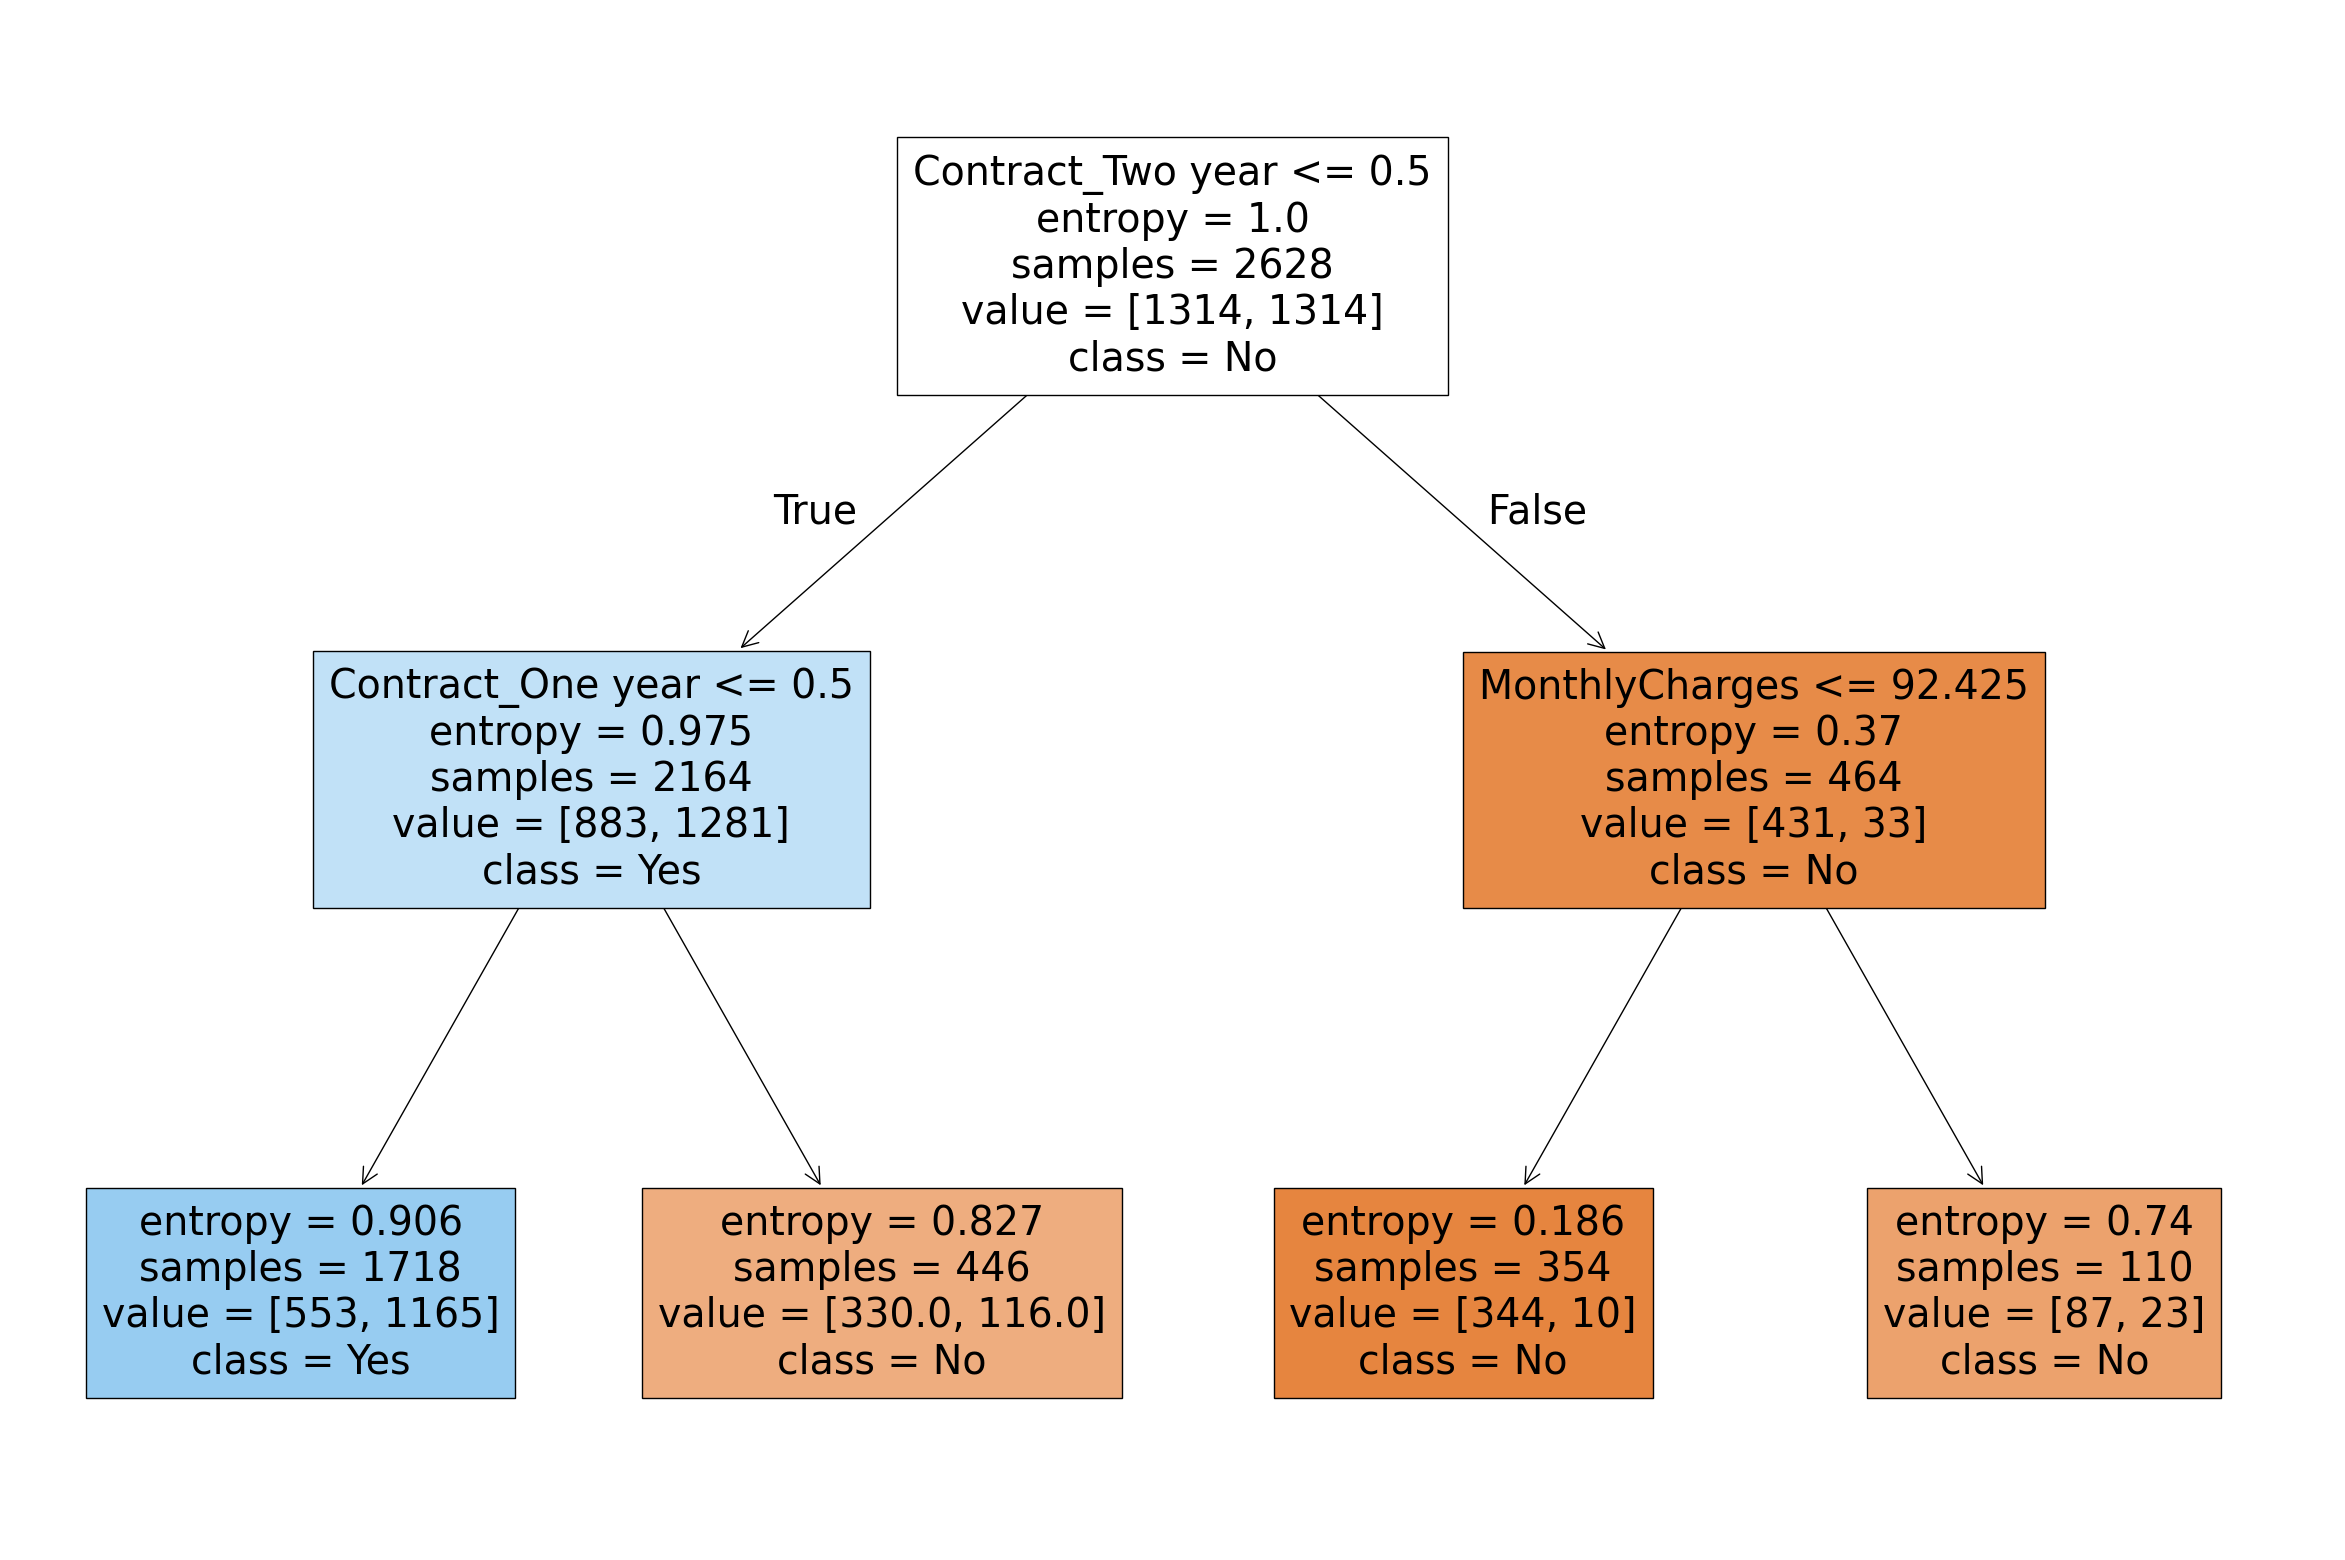

In [ ]:
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

In [ ]:
prediction_on_test = model.predict(predictors_test)

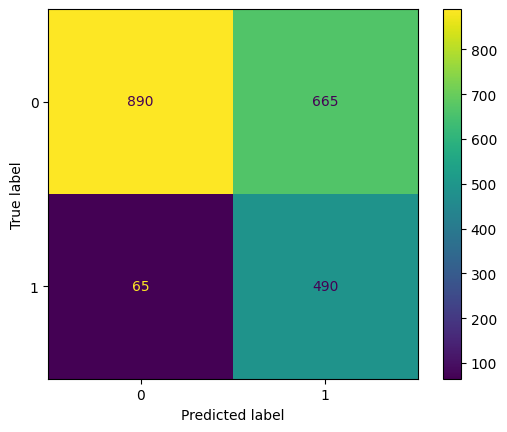

In [ ]:
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [ ]:
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

           0       0.93      0.57      0.71      1555
           1       0.42      0.88      0.57       555

    accuracy                           0.65      2110
   macro avg       0.68      0.73      0.64      2110
weighted avg       0.80      0.65      0.67      2110



The decision tree model achieved an overall accuracy of 65% indicating moderate performance in predicting customer churn. It performs very well in identifying customers that terminate their contracts. However, its precision for churned customers is low (42%), meaning that many customers which stay are predicted as churning.

This model is effectively useful in terms of identifying churn risks. However, the high false positive rate might lead to unnecessary retention efforts aimed at customers who were not actually leaving.

**Strengths**


*   High recall for churned customers (0.88) makes it valuable for identifying at-risk customers
*   Simplicity and interpretability: Ease of identifying key customer churn factors

**Limitations**


*   Low precision for predicting churn leading to many false positives and potentially inefficient retention efforts
*   Decision Tree's tendency to overfit, which may reduce the ability to generalize well to new data






In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/TelcoCustomerChurn.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/TelcoCustomerChurn.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 867989 bytes to /content/drive/MyDrive/Colab Notebooks/TelcoCustomerChurn.html
